# Statistics of the model performance and Statistics of Predicted parameters vs True parameters

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import corner

In [2]:
num_train = 26000    #used to train the machine
num_validation = 2000
num_test  = 2000
num_eg = num_train+num_validation+num_test

In [3]:
model_path = 'cnn_model__params_5_dp_dnu_q_aer_acr__pos_enc_f__lay_6__drop_1_0.25__ksize_5__filters_16__loss_mse__epochs_35__bs_128__train_eg_260k__activ_tanh'
if model_path!='':
    model_path = model_path+'/'

In [4]:
Dp_predicted,Dnu_predicted,q_predicted,aer_predicted,acr_predicted = np.loadtxt(model_path+'predicted_parameters.txt',unpack=True)


In [5]:
Y  = np.loadtxt('labels_30k.txt')
snr= Y[:,10]
aer, acr, Dnu, Dp, q = Y[:,0], Y[:,1], Y[:,2], Y[:,7], Y[:,9] 

#epsilon_p = Y[:,3]


#Scale parameters in b/w [0,1]
def scale_parameter(a):
    a = (a-a.min())/(a.max()-a.min())
    return a

aer_true = scale_parameter(aer)
acr_true = scale_parameter(acr)
Dnu_true = scale_parameter(Dnu)
Dp_true  = scale_parameter(Dp)
q_true   = scale_parameter(q)


## Model performance while training w.r.t each parameter: Dnu,q,Dp


Loss: Mean squared error

$\hat{y}=predicted$, $y=true$

Pearson Correlation coefficient(True,Predicted): $\rho_{X,Y}= \operatorname{cov}(y,\hat{y})/{\sigma_y \sigma_\hat{y}}$

Explained(True,Predicted): $explained\_{}variance(y, \hat{y}) = 1 - (Var\{ y - \hat{y}\}/{Var\{y\}})$

r2- Coefficient of Determination: $R^2(y, \hat{y}) = 1 - (\sum_{i=1}^{n} (y_i - \hat{y}_i)^2/{\sum_{i=1}^{n} (y_i - \bar{y})^2})$

Ref: https://scikit-learn.org/stable/modules/model_evaluation.html

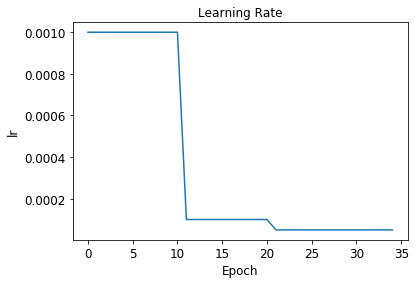

In [45]:
plt.figure()
plt.plot(np.loadtxt(model_path+'lr.txt'))
plt.ylabel('lr',fontsize=12)
plt.xlabel('Epoch',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Learning Rate')
plt.show()

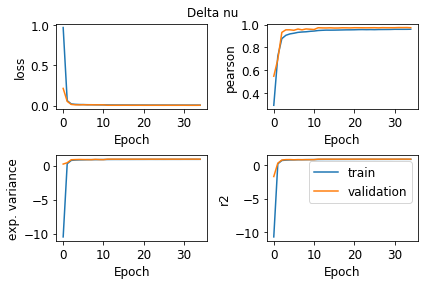

In [6]:
fig, axes = plt.subplots(2, 2)

plt.subplot(221)
plt.plot(np.loadtxt(model_path+'Dnu_loss.txt'))
plt.plot(np.loadtxt(model_path+'val_Dnu_loss.txt'))
plt.ylabel('loss',fontsize=12)
plt.xlabel('Epoch',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(222)
plt.plot(np.loadtxt(model_path+'Dnu_pearson_correlation_coefficient.txt'))
plt.plot(np.loadtxt(model_path+'val_Dnu_pearson_correlation_coefficient.txt'))
plt.ylabel('pearson',fontsize=12)
plt.xlabel('Epoch',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(223)
plt.plot(np.loadtxt(model_path+'Dnu_explained_variance.txt'))
plt.plot(np.loadtxt(model_path+'val_Dnu_explained_variance.txt'))
plt.ylabel('exp. variance',fontsize=12)
plt.xlabel('Epoch',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(224)
plt.plot(np.loadtxt(model_path+'Dnu_r2.txt'),label='train')
plt.plot(np.loadtxt(model_path+'val_Dnu_r2.txt'),label='validation')
plt.ylabel('r2',fontsize=12)
plt.xlabel('Epoch',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(fontsize=12)
plt.suptitle('Delta nu',fontsize=12)
fig.tight_layout()
fig.subplots_adjust(top=0.92)

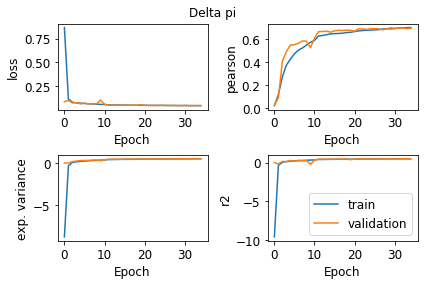

In [7]:
fig, axes = plt.subplots(2, 2)

plt.subplot(221)
plt.plot(np.loadtxt(model_path+'Dp_loss.txt'))
plt.plot(np.loadtxt(model_path+'val_Dp_loss.txt'))
plt.ylabel('loss',fontsize=12)
plt.xlabel('Epoch',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(222)
plt.plot(np.loadtxt(model_path+'Dp_pearson_correlation_coefficient.txt'))
plt.plot(np.loadtxt(model_path+'val_Dp_pearson_correlation_coefficient.txt'))
plt.ylabel('pearson',fontsize=12)
plt.xlabel('Epoch',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(223)
plt.plot(np.loadtxt(model_path+'Dp_explained_variance.txt'))
plt.plot(np.loadtxt(model_path+'val_Dp_explained_variance.txt'))
plt.ylabel('exp. variance',fontsize=12)
plt.xlabel('Epoch',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(224)
plt.plot(np.loadtxt(model_path+'Dp_r2.txt'),label='train')
plt.plot(np.loadtxt(model_path+'val_Dp_r2.txt'),label='validation')
plt.ylabel('r2',fontsize=12)
plt.xlabel('Epoch',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(fontsize=12)
plt.suptitle('Delta pi',fontsize=12)
fig.tight_layout()
fig.subplots_adjust(top=0.92)

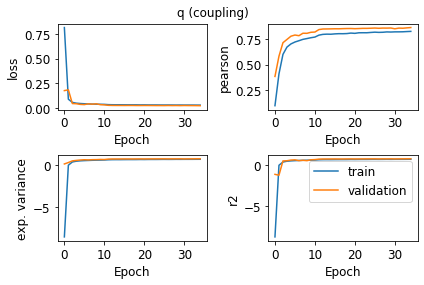

In [8]:
fig, axes = plt.subplots(2, 2)

plt.subplot(221)
plt.plot(np.loadtxt(model_path+'q_loss.txt'))
plt.plot(np.loadtxt(model_path+'val_q_loss.txt'))
plt.ylabel('loss',fontsize=12)
plt.xlabel('Epoch',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(222)
plt.plot(np.loadtxt(model_path+'q_pearson_correlation_coefficient.txt'))
plt.plot(np.loadtxt(model_path+'val_q_pearson_correlation_coefficient.txt'))
plt.ylabel('pearson',fontsize=12)
plt.xlabel('Epoch',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(223)
plt.plot(np.loadtxt(model_path+'q_explained_variance.txt'))
plt.plot(np.loadtxt(model_path+'val_q_explained_variance.txt'))
plt.ylabel('exp. variance',fontsize=12)
plt.xlabel('Epoch',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(224)
plt.plot(np.loadtxt(model_path+'q_r2.txt'),label='train')
plt.plot(np.loadtxt(model_path+'val_q_r2.txt'),label='validation')
plt.ylabel('r2',fontsize=12)
plt.xlabel('Epoch',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(fontsize=12)
plt.suptitle('q (coupling)',fontsize=12)
fig.tight_layout()
fig.subplots_adjust(top=0.92)

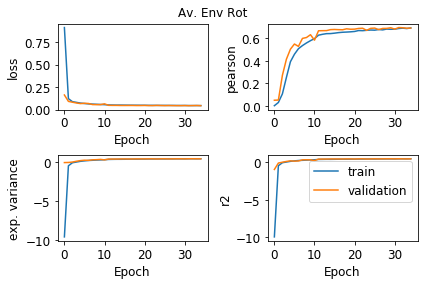

In [9]:
fig, axes = plt.subplots(2, 2)

plt.subplot(221)
plt.plot(np.loadtxt(model_path+'aer_loss.txt'))
plt.plot(np.loadtxt(model_path+'val_aer_loss.txt'))
plt.ylabel('loss',fontsize=12)
plt.xlabel('Epoch',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(222)
plt.plot(np.loadtxt(model_path+'aer_pearson_correlation_coefficient.txt'))
plt.plot(np.loadtxt(model_path+'val_aer_pearson_correlation_coefficient.txt'))
plt.ylabel('pearson',fontsize=12)
plt.xlabel('Epoch',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(223)
plt.plot(np.loadtxt(model_path+'aer_explained_variance.txt'))
plt.plot(np.loadtxt(model_path+'val_aer_explained_variance.txt'))
plt.ylabel('exp. variance',fontsize=12)
plt.xlabel('Epoch',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(224)
plt.plot(np.loadtxt(model_path+'aer_r2.txt'),label='train')
plt.plot(np.loadtxt(model_path+'val_aer_r2.txt'),label='validation')
plt.ylabel('r2',fontsize=12)
plt.xlabel('Epoch',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(fontsize=12)
plt.suptitle('Av. Env Rot',fontsize=12)
fig.tight_layout()
fig.subplots_adjust(top=0.92)

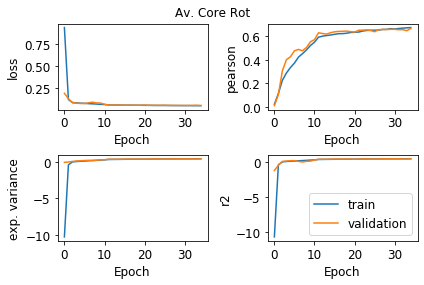

In [10]:
fig, axes = plt.subplots(2, 2)

plt.subplot(221)
plt.plot(np.loadtxt(model_path+'acr_loss.txt'))
plt.plot(np.loadtxt(model_path+'val_acr_loss.txt'))
plt.ylabel('loss',fontsize=12)
plt.xlabel('Epoch',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(222)
plt.plot(np.loadtxt(model_path+'acr_pearson_correlation_coefficient.txt'))
plt.plot(np.loadtxt(model_path+'val_acr_pearson_correlation_coefficient.txt'))
plt.ylabel('pearson',fontsize=12)
plt.xlabel('Epoch',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(223)
plt.plot(np.loadtxt(model_path+'acr_explained_variance.txt'))
plt.plot(np.loadtxt(model_path+'val_acr_explained_variance.txt'))
plt.ylabel('exp. variance',fontsize=12)
plt.xlabel('Epoch',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(224)
plt.plot(np.loadtxt(model_path+'acr_r2.txt'),label='train')
plt.plot(np.loadtxt(model_path+'val_acr_r2.txt'),label='validation')
plt.ylabel('r2',fontsize=12)
plt.xlabel('Epoch',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(fontsize=12)
plt.suptitle('Av. Core Rot',fontsize=12)
fig.tight_layout()
fig.subplots_adjust(top=0.92)

##  Scatter plots of Predicted values vs True values:

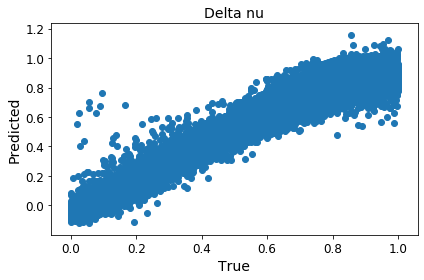

In [11]:
plt.figure()
plt.scatter(Dnu_true,Dnu_predicted)
plt.ylabel('Predicted',fontsize=14)
plt.xlabel('True',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Delta nu',fontsize=14)
plt.tight_layout()


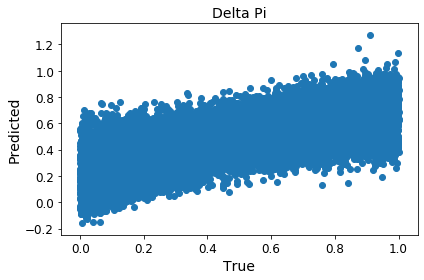

In [12]:
plt.figure()
plt.scatter(Dp_true,Dp_predicted)
plt.ylabel('Predicted',fontsize=14)
plt.xlabel('True',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Delta Pi',fontsize=14)
plt.tight_layout()

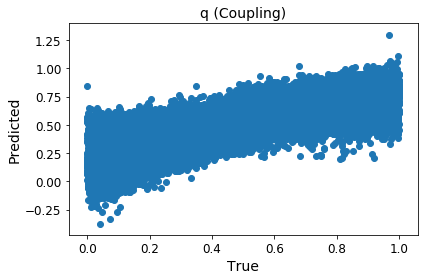

In [13]:
plt.figure()
plt.scatter(q_true,q_predicted)
plt.ylabel('Predicted',fontsize=14)
plt.xlabel('True',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('q (Coupling)',fontsize=14)
plt.tight_layout()

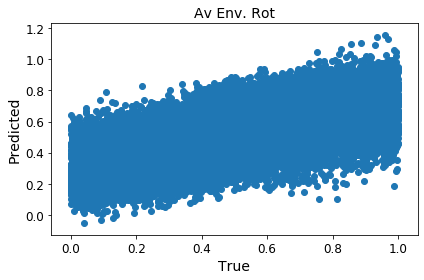

In [14]:
plt.figure()
plt.scatter(aer_true,aer_predicted)
plt.ylabel('Predicted',fontsize=14)
plt.xlabel('True',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Av Env. Rot',fontsize=14)
plt.tight_layout()

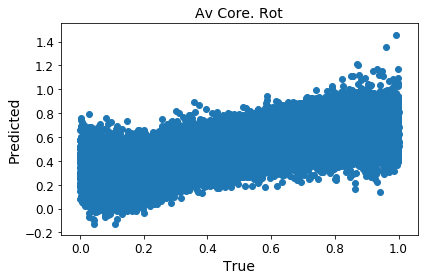

In [15]:
plt.figure()
plt.scatter(acr_true,acr_predicted)
plt.ylabel('Predicted',fontsize=14)
plt.xlabel('True',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Av Core. Rot',fontsize=14)
plt.tight_layout()

##  Histogram plots of Predicted values and True values:

/home/siddharth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/home/siddharth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/siddharth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


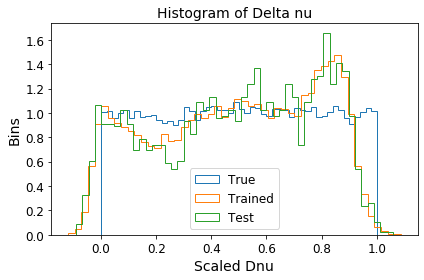

In [16]:
plt.figure()
plt.hist(Dnu_true,bins=50,histtype='step',normed=True,label='True')
plt.hist(Dnu_predicted[:num_train],bins=50,histtype='step',normed=True,label='Trained')
plt.hist(Dnu_predicted[num_train+num_validation:],bins=50,histtype='step',normed=True,label='Test')
plt.xlabel('Scaled Dnu',fontsize=14)
plt.ylabel('Bins',fontsize=14)
plt.title('Histogram of Delta nu',fontsize=14)
plt.legend(loc='lower center',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

/home/siddharth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/home/siddharth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/siddharth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


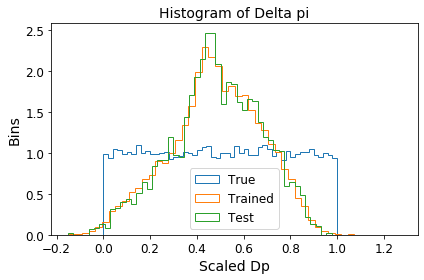

In [17]:
plt.figure()
plt.hist(Dp_true,bins=50,histtype='step',normed=True,label='True')
plt.hist(Dp_predicted[:num_train],bins=50,histtype='step',normed=True,label='Trained')
plt.hist(Dp_predicted[num_train+num_validation:],bins=50,histtype='step',normed=True,label='Test')
plt.xlabel('Scaled Dp',fontsize=14)
plt.ylabel('Bins',fontsize=14)
plt.title('Histogram of Delta pi',fontsize=14)
plt.legend(loc='lower center',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

/home/siddharth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/home/siddharth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/siddharth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


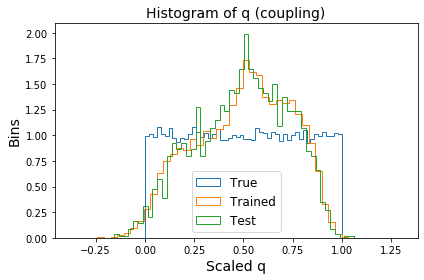

In [18]:
plt.figure()
plt.hist(q_true,bins=50,histtype='step',normed=True,label='True')
plt.hist(q_predicted[:num_train],bins=50,histtype='step',normed=True,label='Trained')
plt.hist(q_predicted[num_train+num_validation:],bins=50,histtype='step',normed=True,label='Test')
plt.xlabel('Scaled q',fontsize=14)
plt.ylabel('Bins',fontsize=14)
plt.title('Histogram of q (coupling)',fontsize=14)
plt.legend(loc='lower center',fontsize=12)
plt.tight_layout()

/home/siddharth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/home/siddharth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/siddharth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


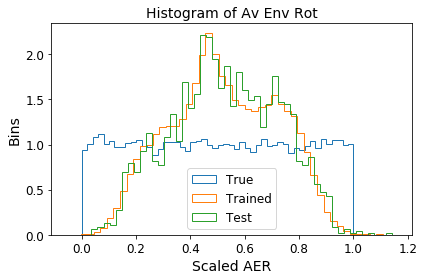

In [19]:
plt.figure()
plt.hist(aer_true,bins=50,histtype='step',normed=True,label='True')
plt.hist(aer_predicted[:num_train],bins=50,histtype='step',normed=True,label='Trained')
plt.hist(aer_predicted[num_train+num_validation:],bins=50,histtype='step',normed=True,label='Test')
plt.xlabel('Scaled AER',fontsize=14)
plt.ylabel('Bins',fontsize=14)
plt.title('Histogram of Av Env Rot',fontsize=14)
plt.legend(loc='lower center',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

/home/siddharth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/home/siddharth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/siddharth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


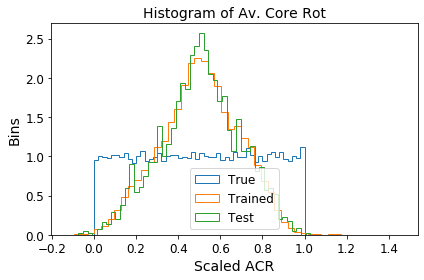

In [20]:
plt.figure()
plt.hist(acr_true,bins=50,histtype='step',normed=True,label='True')
plt.hist(acr_predicted[:num_train],bins=50,histtype='step',normed=True,label='Trained')
plt.hist(acr_predicted[num_train+num_validation:],bins=50,histtype='step',normed=True,label='Test')
plt.xlabel('Scaled ACR',fontsize=14)
plt.ylabel('Bins',fontsize=14)
plt.title('Histogram of Av. Core Rot',fontsize=14)
plt.legend(loc='lower center',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

## Histogram plot of Difference between predicted and true values:

In [21]:
difference_dnu =  Dnu_predicted - Dnu_true
difference_dp  =  Dp_predicted  - Dp_true
difference_q   =  q_predicted   - q_true
difference_aer =  aer_predicted - aer_true
difference_acr =  acr_predicted - acr_true


/home/siddharth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/home/siddharth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


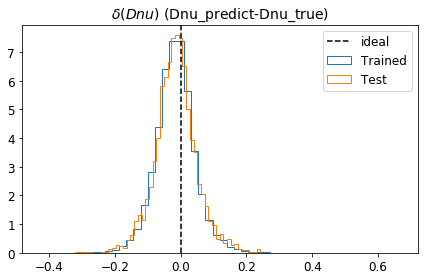

In [22]:
plt.figure()
plt.hist(difference_dnu[:num_train],bins=50,histtype='step',normed=True,label='Trained')
plt.hist(difference_dnu[num_train+num_validation:],bins=50,histtype='step',normed=True,label='Test')
plt.axvline(0,linestyle='dashed',color='k',label='ideal')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.title('$\delta(Dnu)$ (Dnu_predict-Dnu_true)',fontsize=14)
plt.tight_layout()

/home/siddharth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/home/siddharth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


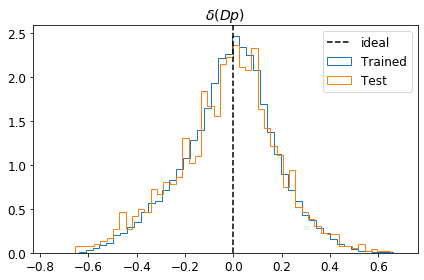

In [23]:
plt.figure()
plt.hist(difference_dp[:num_train],bins=50,histtype='step',normed=True,label='Trained')
plt.hist(difference_dp[num_train+num_validation:],bins=50,histtype='step',normed=True,label='Test')
plt.axvline(0,linestyle='dashed',color='k',label='ideal')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.title('$\delta(Dp)$ ',fontsize=14)
plt.tight_layout()

/home/siddharth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/home/siddharth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


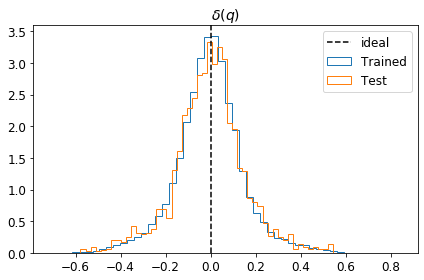

In [24]:
plt.figure()
plt.hist(difference_q[:num_train],bins=50,histtype='step',normed=True,label='Trained')
plt.hist(difference_q[num_train+num_validation:],bins=50,histtype='step',normed=True,label='Test')
plt.axvline(0,linestyle='dashed',color='k',label='ideal')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.title('$\delta(q)$',fontsize=14)
plt.tight_layout()

/home/siddharth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/home/siddharth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


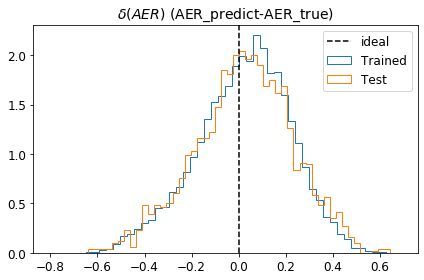

In [25]:
plt.figure()
plt.hist(difference_aer[:num_train],bins=50,histtype='step',normed=True,label='Trained')
plt.hist(difference_aer[num_train+num_validation:],bins=50,histtype='step',normed=True,label='Test')
plt.axvline(0,linestyle='dashed',color='k',label='ideal')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.title('$\delta(AER)$ (AER_predict-AER_true)',fontsize=14)
plt.tight_layout()

/home/siddharth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/home/siddharth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


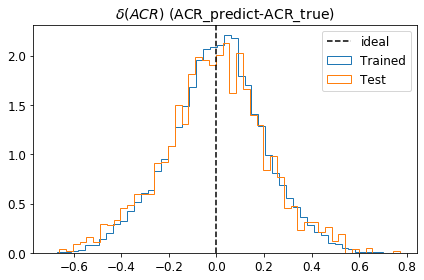

In [26]:
plt.figure()
plt.hist(difference_acr[:num_train],bins=50,histtype='step',normed=True,label='Trained')
plt.hist(difference_acr[num_train+num_validation:],bins=50,histtype='step',normed=True,label='Test')
plt.axvline(0,linestyle='dashed',color='k',label='ideal')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.title('$\delta(ACR)$ (ACR_predict-ACR_true)',fontsize=14)
plt.tight_layout()

## Corner plot of the difference between true and predicted (blue is ideal 0; black dashed lines are [0.16,0.5,0.84] quantiles):

### Train data + Test data corner plot:

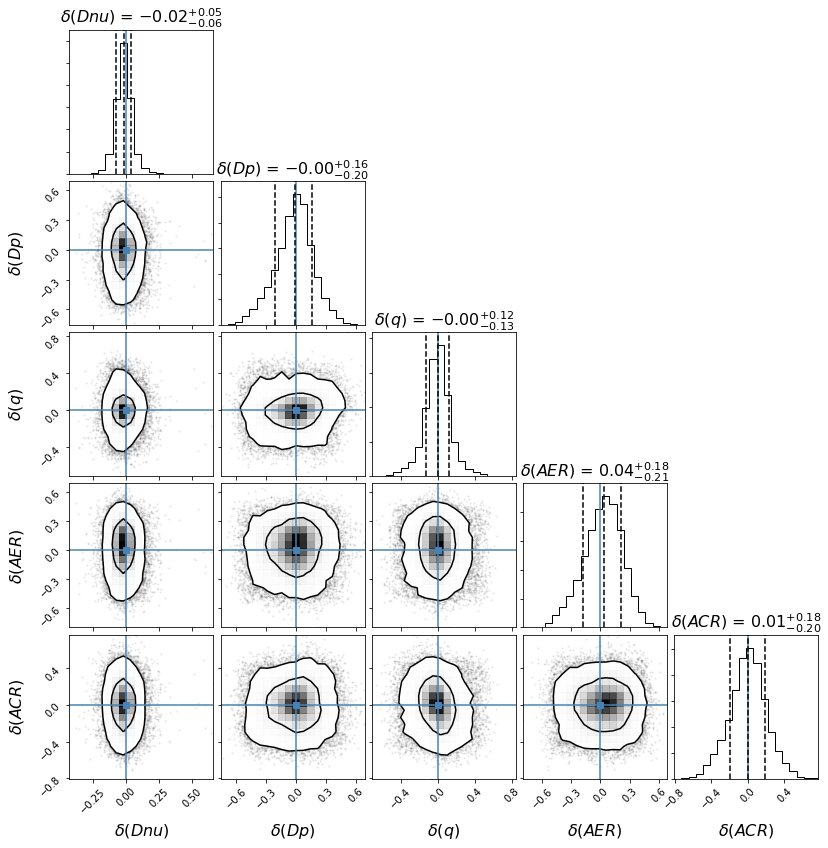

In [27]:
fig=corner.corner(np.c_[difference_dnu,difference_dp,difference_q,difference_aer,difference_acr],labels=['$\delta(Dnu)$','$\delta(Dp)$','$\delta(q)$','$\delta(AER)$','$\delta(ACR)$'],levels=[0.68,0.95],truths=[0,0,0,0,0],
                  label_kwargs={"fontsize": 16},quantiles=[0.16, 0.5, 0.84],show_titles=True,title_kwargs={"fontsize": 16})

### Test data corner plot:

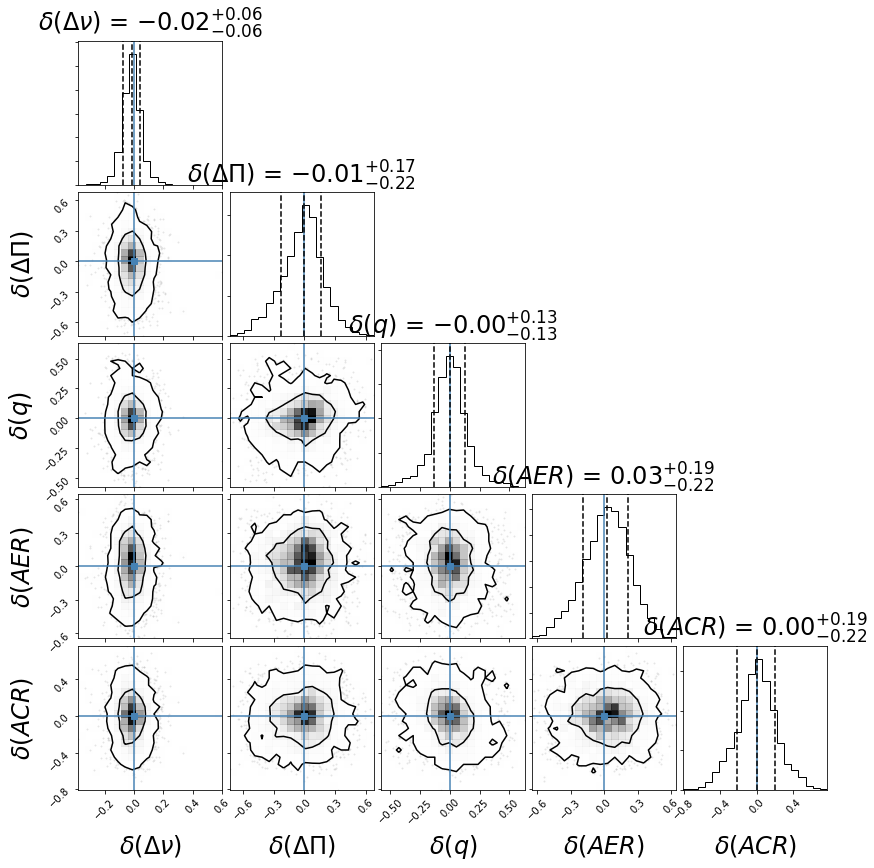

In [28]:
fig=corner.corner(np.c_[difference_dnu[num_train:],difference_dp[num_train:],difference_q[num_train:],difference_aer[num_train:],difference_acr[num_train:]],labels=['$\delta(\Delta \u03BD)$','$\delta(\Delta \Pi)$','$\delta(q)$','$\delta(AER)$','$\delta(ACR)$'],levels=[0.68,0.95],truths=[0,0,0,0,0],
                 label_kwargs={"fontsize": 24},quantiles=[0.16, 0.5, 0.84],show_titles=True,title_kwargs={"fontsize": 24})
#plt.tight_layout()
#plt.savefig('corner_2.png')

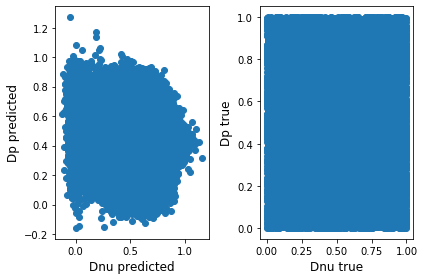

In [29]:
plt.subplot(121)
plt.plot(Dnu_predicted,Dp_predicted,'o')
plt.xlabel('Dnu predicted',fontsize=12)
plt.ylabel('Dp predicted',fontsize=12)
plt.subplot(122)
plt.plot(Dnu_true,Dp_true,'o')
plt.xlabel('Dnu true',fontsize=12)
plt.ylabel('Dp true',fontsize=12)
plt.tight_layout()

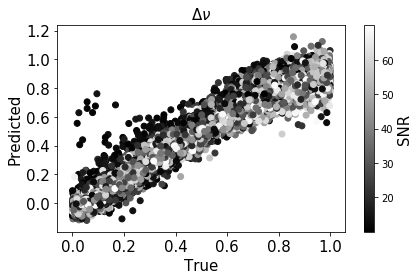

In [30]:
plt.figure()
plt.scatter(Dnu_true,Dnu_predicted,c=snr,cmap='gray')
plt.ylabel('Predicted',fontsize=15)
plt.xlabel('True',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('$\Delta \u03BD$',fontsize=15)
cbar = plt.colorbar()
cbar.set_label('SNR',fontsize=15)
plt.tight_layout()
#plt.savefig('dnu_predicted_vs_true_snr.png')

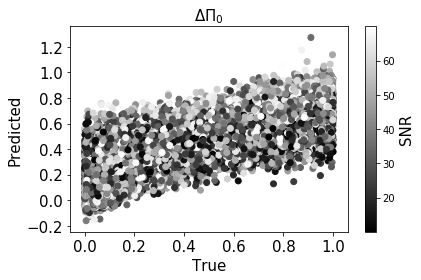

In [31]:
plt.figure()
plt.scatter(Dp_true,Dp_predicted,c=snr,cmap='gray')
plt.ylabel('Predicted',fontsize=15)
plt.xlabel('True',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('$\Delta \Pi_0$',fontsize=15)
cbar = plt.colorbar()
cbar.set_label('SNR',fontsize=15)
plt.tight_layout()
#plt.savefig('dp_predicted_vs_true_snr.png')

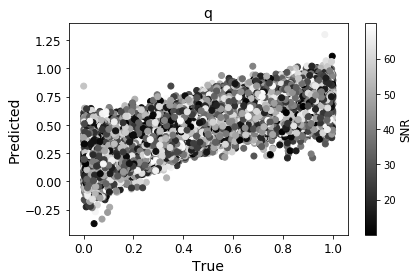

In [32]:
plt.figure()
plt.scatter(q_true,q_predicted,c=snr,cmap='gray')
plt.ylabel('Predicted',fontsize=14)
plt.xlabel('True',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('q',fontsize=14)
cbar = plt.colorbar()
cbar.set_label('SNR',fontsize=12)
plt.tight_layout()
#plt.savefig('q_predicted_vs_true_snr.png')

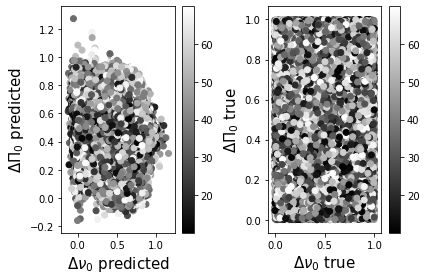

In [33]:
plt.subplot(121)
plt.scatter(Dnu_predicted,Dp_predicted,c=snr,cmap='gray')
plt.xlabel('$\Delta \u03BD_0$ predicted',fontsize=15)
plt.ylabel('$\Delta \Pi_0$ predicted',fontsize=15)
plt.colorbar()
plt.subplot(122)
plt.scatter(Dnu_true,Dp_true,c=snr,cmap='gray')
plt.xlabel('$\Delta \u03BD_0$ true',fontsize=15)
plt.ylabel('$\Delta \Pi_0$ true',fontsize=15)
plt.colorbar()
plt.tight_layout()
#plt.savefig('dnu_dp_predicted_vs_true_snr.png')

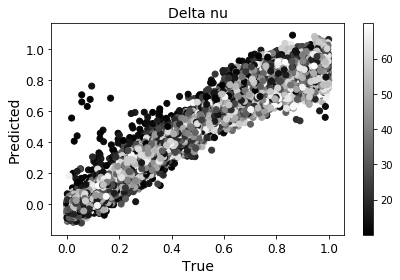

In [34]:
plt.figure()
plt.scatter(Dnu_true[:num_train],Dnu_predicted[:num_train],c=snr[:num_train],cmap='gray')
plt.ylabel('Predicted',fontsize=14)
plt.xlabel('True',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Delta nu',fontsize=14)
plt.colorbar()
plt.tight_layout()

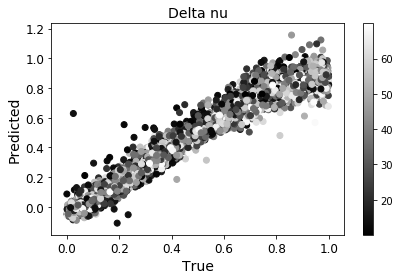

In [35]:
plt.figure()
plt.scatter(Dnu_true[num_train:],Dnu_predicted[num_train:],c=snr[num_train:],cmap='gray')
plt.ylabel('Predicted',fontsize=14)
plt.xlabel('True',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Delta nu',fontsize=14)
plt.colorbar()
plt.tight_layout()

Text(0.5, 1.0, 'Fraction of Dnu error above delta')

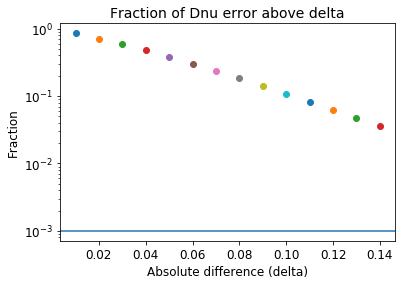

In [36]:
plt.yscale('log')
for delta in np.arange(0.01,0.15,0.01):
    temp1=np.where(np.abs(difference_dnu)>delta)[0]
    temp2=len(temp1)/len(difference_dnu)
    #print(temp2)
    plt.plot(delta,temp2,'o')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.axhline(0.001)
plt.xlabel('Absolute difference (delta)',fontsize=12)
plt.ylabel('Fraction',fontsize=12)
plt.title('Fraction of Dnu error above delta',fontsize=14)
#plt.savefig('frac_dnu.png')

Text(0.5, 1.0, 'Fraction of Dp error above delta')

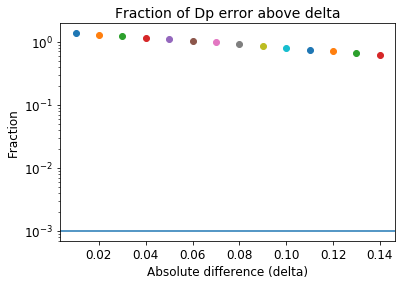

In [37]:
plt.yscale('log')
for delta in np.arange(0.01,0.15,0.01):
    temp1=np.where(np.abs(difference_dp)>delta)[0]
    temp2=len(temp1)/21000
    #print(temp2)
    plt.plot(delta,temp2,'o')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.axhline(0.001)
plt.xlabel('Absolute difference (delta)',fontsize=12)
plt.ylabel('Fraction',fontsize=12)
plt.title('Fraction of Dp error above delta',fontsize=14)
#plt.savefig('frac_dp.png')

Text(0.5, 1.0, 'Fraction of q error above delta')

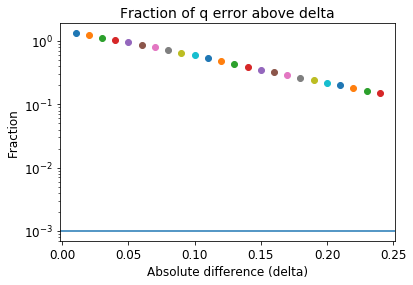

In [38]:
plt.yscale('log')
for delta in np.arange(0.01,0.25,0.01):
    temp1=np.where(np.abs(difference_q)>delta)[0]
    temp2=len(temp1)/21000
    #print(temp2)
    plt.plot(delta,temp2,'o')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.axhline(0.001)
plt.xlabel('Absolute difference (delta)',fontsize=12)
plt.ylabel('Fraction',fontsize=12)
plt.title('Fraction of q error above delta',fontsize=14)
#plt.savefig('frac_q.png')

In [39]:
np.corrcoef(Dnu_predicted,Dp_predicted)

array([[ 1.       , -0.1428592],
       [-0.1428592,  1.       ]])

In [40]:
np.corrcoef(Dnu_true,Dp_true)

array([[1.        , 0.00650571],
       [0.00650571, 1.        ]])

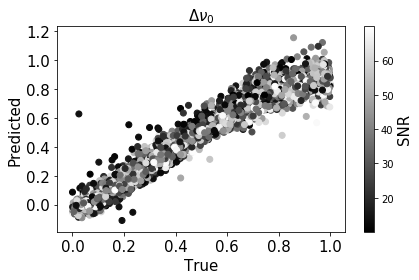

In [41]:
plt.figure()
plt.scatter(Dnu_true[num_train:],Dnu_predicted[num_train:],c=snr[num_train:],cmap='gray')
plt.ylabel('Predicted',fontsize=15)
plt.xlabel('True',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('$\Delta \u03BD_0$',fontsize=15)
cbar = plt.colorbar()
cbar.set_label('SNR',fontsize=15)
plt.tight_layout()
#plt.savefig('dnu_predicted_vs_true_snr_test.png')

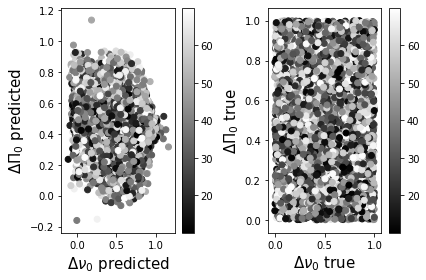

In [42]:
plt.subplot(121)
plt.scatter(Dnu_predicted[num_train:],Dp_predicted[num_train:],c=snr[num_train:],cmap='gray')
plt.xlabel('$\Delta \u03BD_0$ predicted',fontsize=15)
plt.ylabel('$\Delta \Pi_0$ predicted',fontsize=15)
plt.colorbar()
plt.subplot(122)
plt.scatter(Dnu_true[num_train:],Dp_true[num_train:],c=snr[num_train:],cmap='gray')
plt.xlabel('$\Delta \u03BD_0$ true',fontsize=15)
plt.ylabel('$\Delta \Pi_0$ true',fontsize=15)
plt.colorbar()
plt.tight_layout()
#plt.savefig('dnu_dp_predicted_vs_true_snr_test.png')

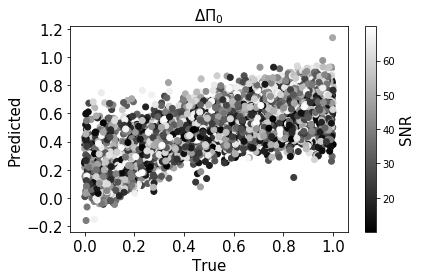

In [43]:
plt.figure()
plt.scatter(Dp_true[num_train:],Dp_predicted[num_train:],c=snr[num_train:],cmap='gray')
plt.ylabel('Predicted',fontsize=15)
plt.xlabel('True',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('$\Delta \Pi_0$',fontsize=15)
cbar = plt.colorbar()
cbar.set_label('SNR',fontsize=15)
plt.tight_layout()
#plt.savefig('dp_predicted_vs_true_snr_test.png')

/home/siddharth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/siddharth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


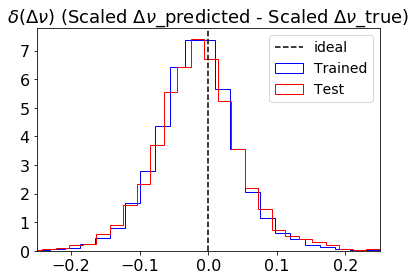

In [44]:
plt.figure()
plt.xlim(-0.25,0.25)
plt.hist(difference_dnu[:num_train],bins=50,color='b',histtype='step',normed=True,label='Trained')
plt.hist(difference_dnu[num_train:],bins=50,color='r',histtype='step',normed=True,label='Test')
plt.axvline(0,linestyle='dashed',color='k',label='ideal')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=14)
plt.title('$\delta(\Delta \u03BD)$ (Scaled $\Delta \u03BD$_predicted - Scaled $\Delta \u03BD$_true)',fontsize=18)
plt.tight_layout()
#plt.savefig('dnu_diff.png')